## Desafio Kaggle: Titanic - Machine Learning from Disaster
#### https://www.kaggle.com/c/titanic/overview

### Imports das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette()
sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Carregamento dos dados

In [2]:
train = pd.read_csv('data/train.csv')
print('Train: {}'.format(train.shape))
test = pd.read_csv('data/test.csv')
print('\nTest: {}'.format(test.shape))

Train: (891, 12)

Test: (418, 11)


### Descrição do conjunto de dados

Esse conjunto contém dados dos passageiros do Titanic. Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

### Características do conjunto

##### 2 classes
##### 1309 exemplos
##### 12 features

- PassengerId: identificador do passageiro;
- Survived: sobrevivência. 0= não e 1= sim;
- Pclass: classe da passagem. 1= primeira classe, 2= segunda e 3= terceira;
- Name: nome do passageiro;
- Sex: sexo;
- Age: idade;
- SibSp: número de irmãos/cônjuges a bordo;
- Parch: número de pais/filhos a bordo;
- Ticket: número da passagem;
- Fare: valor da tarifa;
- Cabin: número da cabine;
- Embarked: local de embarque. C= Cherbourg, Q= Queenstown, S= Southampton

In [3]:
print('Colunas presentes: {}'.format(train.columns))

Colunas presentes: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### Remove a coluna id dos dados

In [5]:
trainPassengerId = train['PassengerId']
train.drop(['PassengerId'], axis=1, inplace=True)

testPassengerId = test['PassengerId']
test.drop(['PassengerId'], axis=1, inplace=True)

### Amostra dos dados

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Concatena os dados

In [7]:
nTrain= train.shape[0]
nTest = test.shape[0]

In [8]:
df = pd.concat((train, test)).reset_index(drop=True)
print('Dataset shape: {} '.format(df.shape))

Dataset shape: (1309, 11) 


### Exploração dos dados

In [9]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [28]:
df.describe(include=['O'])

,embarque,nome,sexo,passagem
count,1307,1309,1309,1309
unique,3,1307,2,929
top,S,"Kelly, Mr. James",male,CA. 2343
freq,914,2,843,11


### Pré-processamento dos dados

#### Renomeia as colunas

In [12]:
cols = {
    'Survived': 'sobrevivente',
    'Pclass': 'classe',
    'Name': 'nome',
    'Sex': 'sexo',
    'Age': 'idade',
    'SibSp': 'irmaosEconjunges',
    'Parch': 'paisEfilhos',
    'Ticket': 'passagem',
    'Fare': 'tarifa',
    'Cabin': 'cabine',
    'Embarked': 'embarque'
}

df = df.rename(columns=cols)

#### Valores faltantes

In [20]:
df_na = df.isnull().mean()* 100
print('Valores faltantes:')
df_na

Valores faltantes:


idade               20.091673
cabine              77.463713
embarque             0.152788
tarifa               0.076394
nome                 0.000000
paisEfilhos          0.000000
classe               0.000000
sexo                 0.000000
irmaosEconjunges     0.000000
sobrevivente        31.932773
passagem             0.000000
dtype: float64

Text(0.5, 1.0, 'Valores faltantes por coluna')

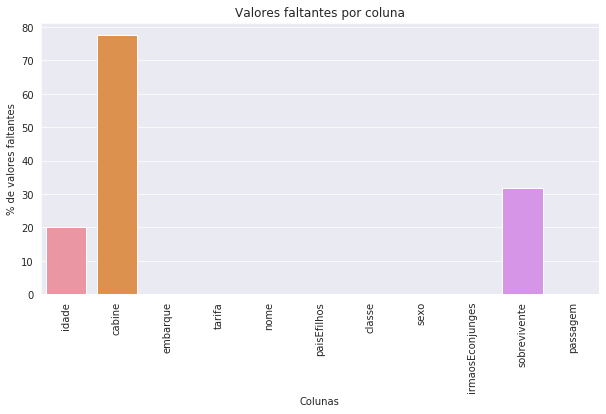

In [22]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=df_na.index, y=df_na)

plt.xticks(rotation='90')
plt.xlabel('Colunas')
plt.ylabel('% de valores faltantes')
plt.title('Valores faltantes por coluna')

### Tratando os dados nulos

In [23]:
df.drop(['cabine'], axis=1, inplace=True)

In [31]:
df['idade'] = df['idade'].fillna(df['idade'].mean())
df['tarifa'] = df['tarifa'].fillna(df['tarifa'].mean())

In [32]:
df['sobrevivente'] = df['sobrevivente'].fillna(df['sobrevivente'].mode()[0])
df['embarque'] = df['embarque'].fillna(df['embarque'].mode()[0])